# Part 2.2

## **Matplot**LIB Python API

In [2]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

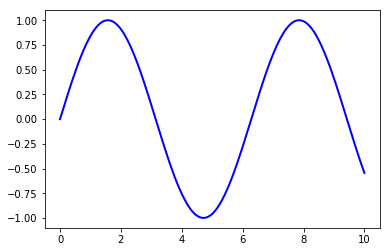

In [3]:
# Non-Pythonic (MATLAB like)

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

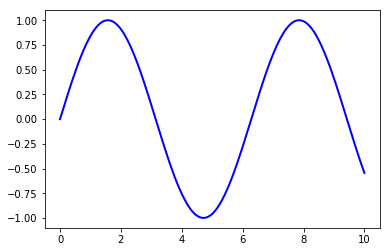

In [5]:
#Pythonic API

fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

* `fig` is a `Figure` instance, a blank canvas
* `ax` is an `AxesSubPlot` instance - a frame for plotting inside of it.
* `plot()` function is actually a method of `ax`.

This is a bit more typing, but the explicit use of objects also gives us a lot more control.

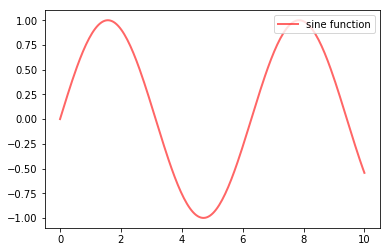

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper right')
plt.show()

Changed the line to red, used `alpha` to add transparency, and added a legend with the `ax.legend()` method.

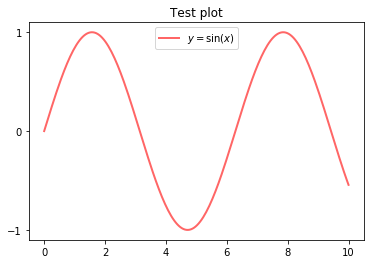

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

Added, LaTeX to legend, A title to the plot via `set_title()` and ticks along the y-axis using `set_yticks()`.

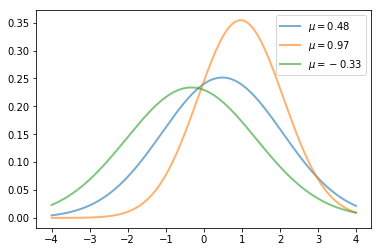

In [10]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

Multiple Plots on one axis using repeated calls to the same `ax.plot()` instance.

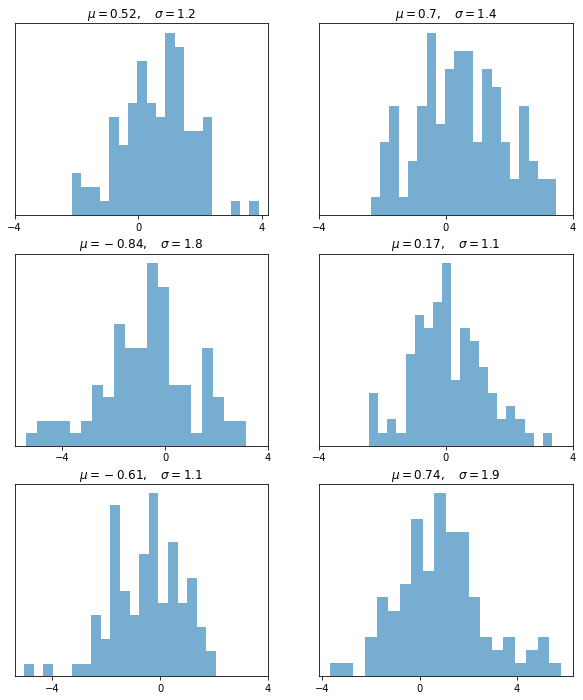

In [12]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

Multiple subplots in a single figure using `ax[r,c].plot()` & `ax[r,c].hist()`

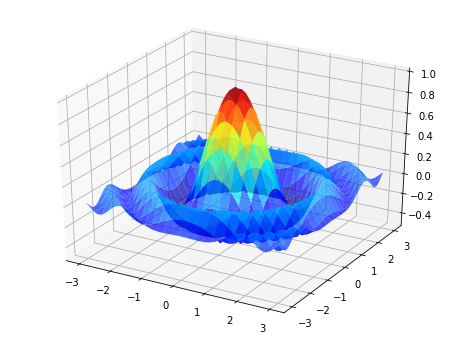

In [13]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()


3D plots, using `ax.plot_surface(x,y,z,**)`, `add_subplot(ijk,projection='3d')`, the Z-axis is clipped using `ax.set_zlim(min_z,max_z)` and mesh itself is generated using a a custom function together with `np.meshgrid()`

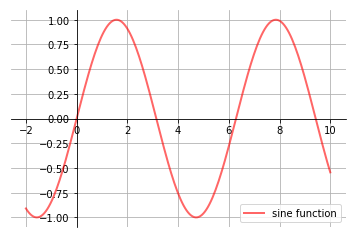

In [14]:
def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()


A customized Plotting function, that forces the axes to go through the origin, and adds grids for both x and y axes. The call to matplotlib's functions are replaced by the locally defined function `subplot()`.

## Exercises

### Exercise 1:

Plot the function
$f(x) = \cos(\pi \theta x) \exp(-x)$

over the interval [0,5]
for each θ

in np.linspace(0, 2, 10)

Place all the curves in the same figure.

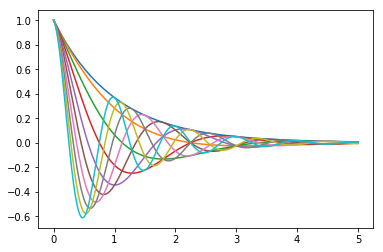

[0.0]-->>[5.0]


In [37]:
thetas = np.linspace(0,2,10)
x_values = np.linspace(0,5,1000000)

fig,ax  = plt.subplots(squeeze=True)

for theta in thetas:
    ax.plot(x, np.cos(np.pi * theta * x) * np.exp(- x))
plt.show()

print("[{}]-->>[{}]".format(np.min(x_values), np.max(x_values)))